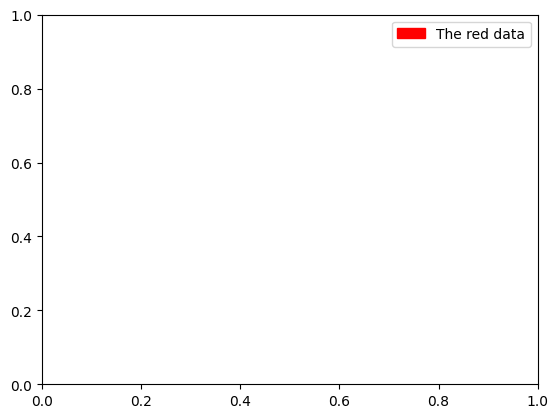

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
red_patch = mpatches.Patch(color='red', label='The red data')
ax.legend(handles=[red_patch])

plt.show()


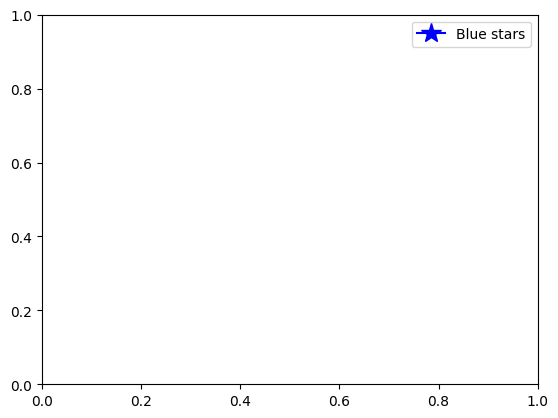

In [ ]:
import matplotlib.lines as mlines

fig, ax = plt.subplots()
blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=15, label='Blue stars')
ax.legend(handles=[blue_line])

plt.show()

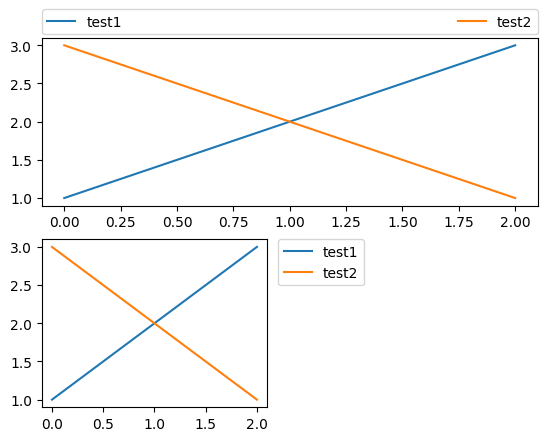

In [ ]:
fig, ax_dict = plt.subplot_mosaic([['top', 'top'], ['bottom', 'BLANK']],
                                  empty_sentinel="BLANK")
ax_dict['top'].plot([1, 2, 3], label="test1")
ax_dict['top'].plot([3, 2, 1], label="test2")
# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
ax_dict['top'].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncols=2, mode="expand", borderaxespad=0.)

ax_dict['bottom'].plot([1, 2, 3], label="test1")
ax_dict['bottom'].plot([3, 2, 1], label="test2")
# Place a legend to the right of this smaller subplot.
ax_dict['bottom'].legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

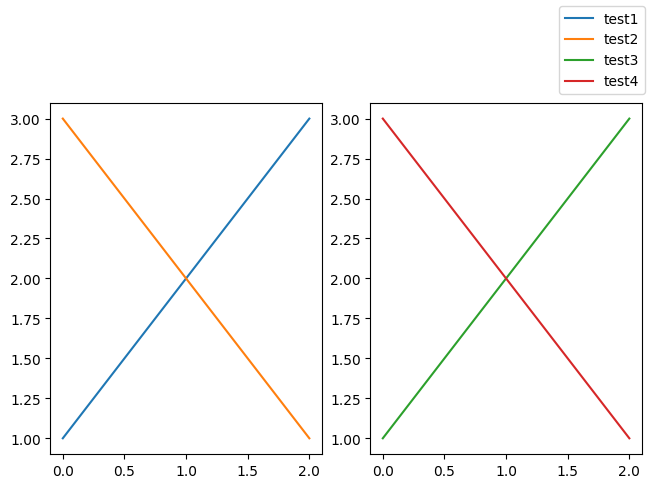

In [ ]:
fig, axs = plt.subplot_mosaic([['left', 'right']], layout='constrained')

axs['left'].plot([1, 2, 3], label="test1")
axs['left'].plot([3, 2, 1], label="test2")

axs['right'].plot([1, 2, 3], 'C2', label="test3")
axs['right'].plot([3, 2, 1], 'C3', label="test4")
# Place a legend to the right of this smaller subplot.
fig.legend(loc='outside upper right')


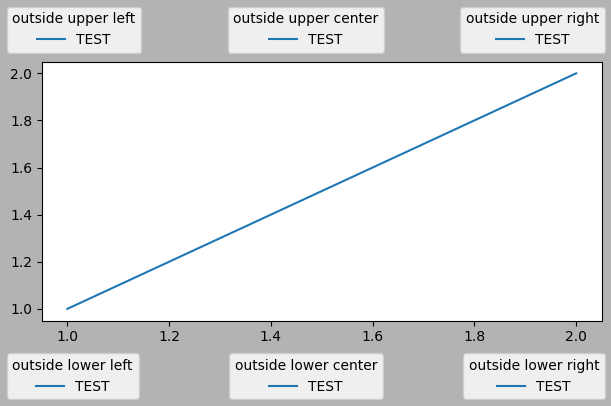

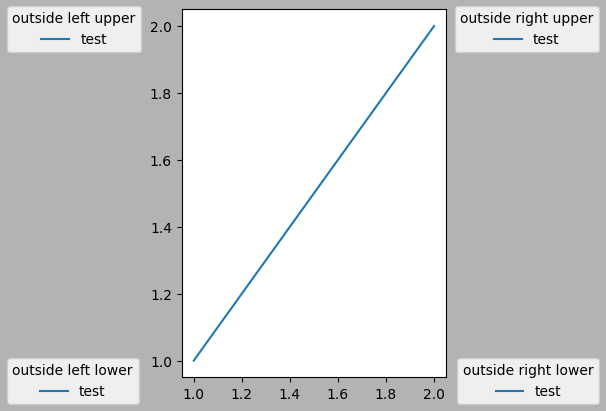

In [ ]:
ucl = ['upper', 'center', 'lower']
lcr = ['left', 'center', 'right']
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained', facecolor='0.7')

ax.plot([1, 2], [1, 2], label='TEST')
# Place a legend to the right of this smaller subplot.
for loc in [
        'outside upper left',
        'outside upper center',
        'outside upper right',
        'outside lower left',
        'outside lower center',
        'outside lower right']:
    fig.legend(loc=loc, title=loc)

fig, ax = plt.subplots(figsize=(6, 4), layout='constrained', facecolor='0.7')
ax.plot([1, 2], [1, 2], label='test')

for loc in [
        'outside left upper',
        'outside right upper',
        'outside left lower',
        'outside right lower']:
    fig.legend(loc=loc, title=loc)



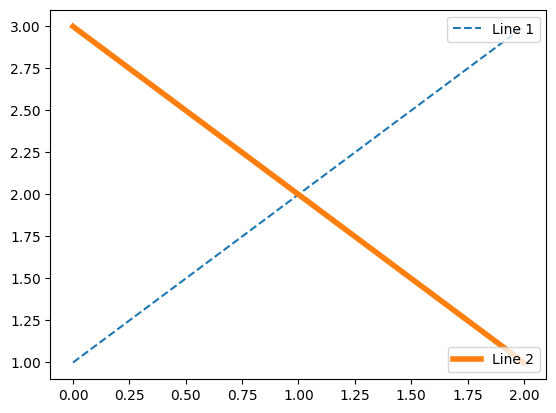

In [ ]:
fig, ax = plt.subplots()
line1, = ax.plot([1, 2, 3], label="Line 1", linestyle='--')
line2, = ax.plot([3, 2, 1], label="Line 2", linewidth=4)

# Create a legend for the first line.
first_legend = ax.legend(handles=[line1], loc='upper right')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Create another legend for the second line.
ax.legend(handles=[line2], loc='lower right')

plt.show()

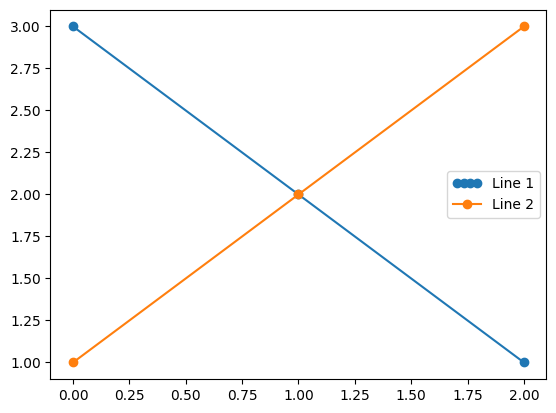

In [ ]:
from matplotlib.legend_handler import HandlerLine2D

fig, ax = plt.subplots()
line1, = ax.plot([3, 2, 1], marker='o', label='Line 1')
line2, = ax.plot([1, 2, 3], marker='o', label='Line 2')

ax.legend(handler_map={line1: HandlerLine2D(numpoints=4)})


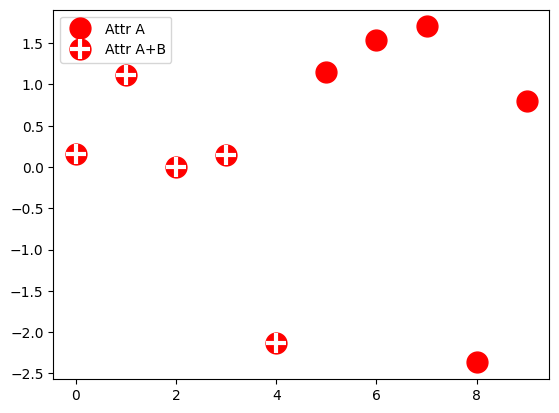

In [ ]:
from numpy.random import randn

z = randn(10)

fig, ax = plt.subplots()
red_dot, = ax.plot(z, "ro", markersize=15)
# Put a white cross over some of the data.
white_cross, = ax.plot(z[:5], "w+", markeredgewidth=3, markersize=15)

ax.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])


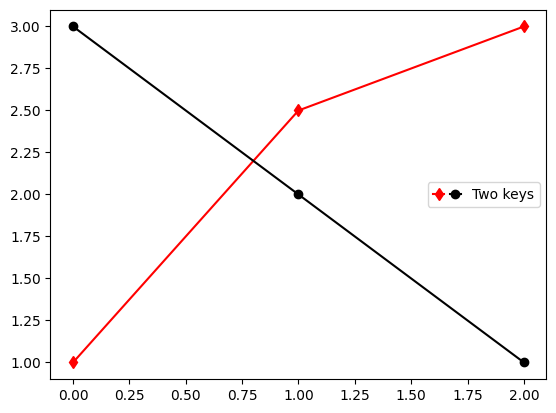

In [ ]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

fig, ax = plt.subplots()
p1, = ax.plot([1, 2.5, 3], 'r-d')
p2, = ax.plot([3, 2, 1], 'k-o')

l = ax.legend([(p1, p2)], ['Two keys'], numpoints=1,
              handler_map={tuple: HandlerTuple(ndivide=None)})


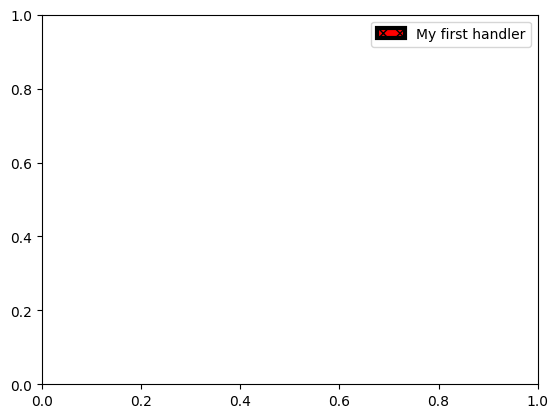

In [ ]:
import matplotlib.patches as mpatches


class AnyObject:
    pass


class AnyObjectHandler:
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpatches.Rectangle([x0, y0], width, height, facecolor='red',
                                   edgecolor='black', hatch='xx', lw=3,
                                   transform=handlebox.get_transform())
        handlebox.add_artist(patch)
        return patch

fig, ax = plt.subplots()

ax.legend([AnyObject()], ['My first handler'],
          handler_map={AnyObject: AnyObjectHandler()})


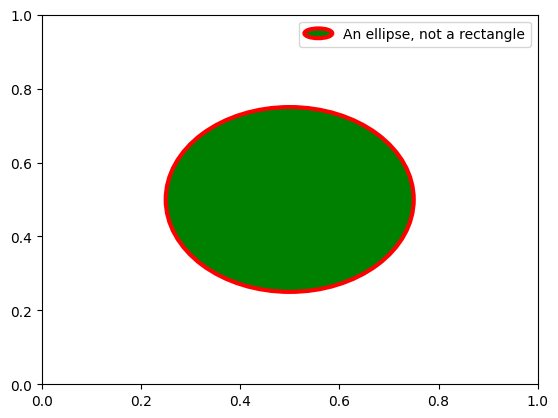

In [ ]:
from matplotlib.legend_handler import HandlerPatch


class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=width + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]


c = mpatches.Circle((0.5, 0.5), 0.25, facecolor="green",
                    edgecolor="red", linewidth=3)

fig, ax = plt.subplots()

ax.add_patch(c)
ax.legend([c], ["An ellipse, not a rectangle"],
          handler_map={mpatches.Circle: HandlerEllipse()})
